# Task 1: Table Booking and Online Delivery

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv("C:/Users/vithu/Downloads/Dataset .csv")
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [93]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [94]:
#Determine the percentage of restaurants that offer table booking and online delivery.
data["Has Table booking"].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [95]:
data["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [96]:
res = data[(data['Has Table booking'] == "Yes") & (data['Has Online delivery'] == "Yes")]
res

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
566,5701978,Pizza Di Rocco,214,Abu Dhabi,Near Corner of Salam and Al Falah Street (9th ...,Al Dhafrah,"Al Dhafrah, Abu Dhabi",54.381931,24.485579,"Italian, Pizza",...,Emirati Diram(AED),Yes,Yes,No,No,3,4.4,Green,Very Good,471
571,5700052,Cho Gao - Crowne Plaza Abu Dhabi,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...","Crowne Plaza Abu Dhabi, Al Markaziya","Crowne Plaza Abu Dhabi, Al Markaziya, Abu Dhabi",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",...,Emirati Diram(AED),Yes,Yes,No,No,4,4.4,Green,Very Good,246
572,5702418,Gazebo,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...","Dalma Mall, Mussafah Sanaiya","Dalma Mall, Mussafah Sanaiya, Abu Dhabi",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",...,Emirati Diram(AED),Yes,Yes,No,No,3,4.0,Green,Very Good,355
578,18235425,Indian By Nature,214,Abu Dhabi,"Shop 2-3, Tolico Building, Behind Lebanese Roa...",Najda,"Najda, Abu Dhabi",54.373250,24.489591,Indian,...,Emirati Diram(AED),Yes,Yes,No,No,3,4.3,Green,Very Good,180
585,206488,Maharaja Bhog,214,Dubai,"Ground Level, Hamsah Mall, Next to Ansar Galle...",Al Karama,"Al Karama, Dubai",55.309190,25.251241,"Indian, Rajasthani",...,Emirati Diram(AED),Yes,Yes,No,No,2,4.1,Green,Very Good,1448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,11371,Chili's,1,Pune,"UG 49, Phoenix Market City, Nagar Road, Viman ...","Phoenix Market City, Viman Nagar","Phoenix Market City, Viman Nagar, Pune",73.916619,18.562450,"Mexican, American, Tex-Mex",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.5,Dark Green,Excellent,1439
9168,18292672,Blue Water,1,Pune,"Punawale, Near Basket Bridge,Off Aundh-Ravet B...",Ravet,"Ravet, Pune",73.751081,18.636215,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.2,Green,Very Good,487
9170,6507967,Tales & Spirits,1,Pune,"Plot 64, Shivaji Housing Society, Senapati Bap...",Senapati Bapat Road,"Senapati Bapat Road, Pune",73.828972,18.530963,"Italian, Continental, Cafe",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.1,Green,Very Good,997
9171,6506206,18 Degrees Resto Lounge,1,Pune,"8th & 9th Floor, Spot 18 Mall, Pimple Saudagar...","Spot 18 Mall, Pimple Saudagar","Spot 18 Mall, Pimple Saudagar, Pune",73.785901,18.593481,"North Indian, Mediterranean, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,3.6,Yellow,Good,1566


In [97]:
res.shape

(435, 21)

In [98]:
res_with_booking_delivery = (res.shape[0])-1
res_with_booking_delivery

434

In [99]:
data_shape = (data.shape[0])-1
data_shape

9550

In [100]:
average = ((res_with_booking_delivery) / (data_shape))*100
average

4.544502617801047

In [101]:
print(f"Percentage of restaurants with both table booking and online delivery: {average:.2f}%")

Percentage of restaurants with both table booking and online delivery: 4.54%


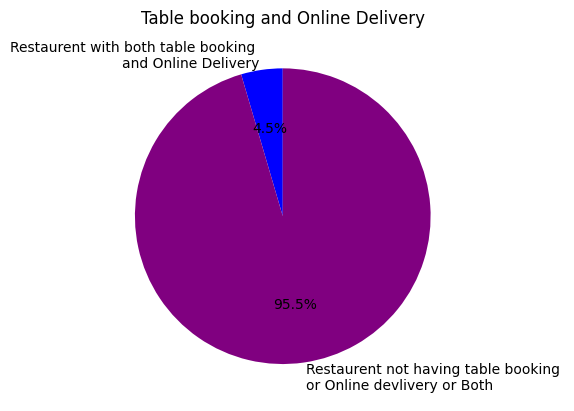

In [102]:
plt.pie([average, 100-average], labels=["Restaurent with both table booking \nand Online Delivery","Restaurent not having table booking \nor Online devlivery or Both"], colors=['blue','purple'], autopct='%1.1f%%', startangle=90)
plt.title("Table booking and Online Delivery")
plt.show()

In [103]:
res_with_table_booking = data[data["Has Table booking"] =="Yes"]
res_with_table_booking

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,6800569,Chaophraya,215,Manchester,"19 Chapel Walks, City Center, Market Street, M...",Market Street,"Market Street, Manchester",-2.243505,53.481740,Thai,...,Pounds(��),Yes,No,No,No,4,4.3,Green,Very Good,422
9415,6801873,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-2.245034,53.477358,"European, Mediterranean, Contemporary",...,Pounds(��),Yes,No,No,No,3,4.2,Green,Very Good,67
9431,18295472,Gymkhana,166,Doha,"Ground Floor, Al Jomrok Boutique Hotel, Souq W...",Souq Waqif,"Souq Waqif, Doha",51.533316,25.289411,Indian,...,Qatari Rial(QR),Yes,No,No,No,4,4.7,Dark Green,Excellent,114
9450,6400621,Nobu - One&Only,189,Cape Town,"One & Only Hotel, Dock Road, V & A Waterfront,...","One and Only Hotel, V & A Waterfront","One and Only Hotel, V & A Waterfront, Cape Town",18.416435,-33.908603,"Japanese, Asian, Seafood, Sushi",...,Rand(R),Yes,No,No,No,4,4.0,Green,Very Good,110


In [104]:
res_with_table_booking_count = (res_with_table_booking.shape[0])-1
res_with_table_booking_count

1157

In [105]:
average_booking_yes = ((res_with_table_booking_count) / (data_shape))
average_booking_yes

0.12115183246073298

In [106]:
print(f"The average ratings of restaurants with table booking: {average_booking_yes:.2f}")

The average ratings of restaurants with table booking: 0.12


In [107]:
#Compare the average ratings of restaurants without table booking

In [108]:
res_with_table_booking_no = data[data["Has Table booking"] =="No"]
res_with_table_booking_no

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
14,6314605,Sodam Korean Restaurant,162,San Juan City,"17 J. Abad Santos Drive, Little Baguio, San Ju...",Little Baguio,"Little Baguio, San Juan City",121.038110,14.598890,Korean,...,Botswana Pula(P),No,No,No,No,3,4.3,Green,Very Good,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [109]:
res_with_table_booking_no_count = (res_with_table_booking_no.shape[0])-1
res_with_table_booking_no_count

8392

In [110]:
average_booking_no = ((res_with_table_booking_no_count) / (data_shape))
average_booking_no

0.8787434554973822

In [111]:
print(f"The average ratings of restaurants without table booking: {average_booking_no:.2f}")

The average ratings of restaurants without table booking: 0.88


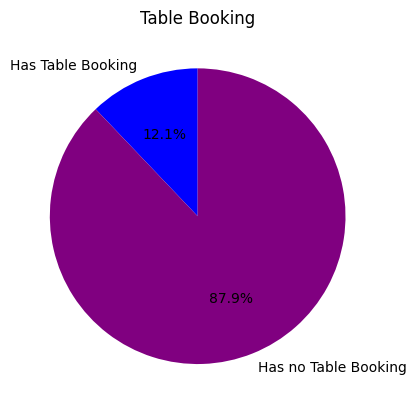

In [112]:
percentage =[average_booking_yes*100, 100-(average_booking_yes*100)]
labels = ['Has Table Booking','Has no Table Booking']
colors = ['blue','purple']

plt.pie(percentage[:2], labels= labels[:2], colors = colors, autopct='%1.1f%%', startangle=90)
plt.title('Table Booking')

plt.show()

In [113]:
data["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [114]:
rest_price_1 = data[(data["Has Online delivery"]=="Yes") & (data["Price range"]==1)]
shape_1= rest_price_1.shape[0]-1
shape_1

700

In [115]:
average_1 = ((shape_1)/data_shape)*100
average_1

7.329842931937172

In [116]:
rest_price_2 = data[(data["Has Online delivery"]=="Yes") & (data["Price range"]==2)]
shape_2= rest_price_2.shape[0]-1
shape_2

1285

In [117]:
average_2 = ((shape_2)/data_shape)*100
average_2

13.455497382198953

In [118]:
rest_price_3 = data[(data["Has Online delivery"]=="Yes") & (data["Price range"]==3)]
shape_3 = rest_price_3.shape[0]-1
shape_3

410

In [119]:
average_3 = ((shape_3)/data_shape)*100
average_3

4.293193717277487

In [120]:
rest_price_4 = data[(data["Has Online delivery"]=="Yes") & (data["Price range"]==4)]
shape_4 = rest_price_4.shape[0]-1
shape_4

52

In [121]:
average_4 = ((shape_4)/data_shape)*100
average_4

0.5445026178010471

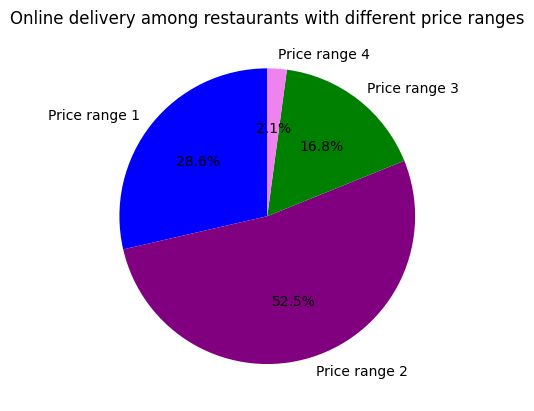

In [122]:
percentage =[average_1, average_2, average_3, average_4]
labels = ["Price range 1", "Price range 2", "Price range 3", "Price range 4"]
colors = ['blue','purple','green', 'violet']

plt.pie(percentage, labels= labels, colors = colors, autopct='%1.1f%%', startangle=90)
plt.title('Online delivery among restaurants with different price ranges')

plt.show()

# Task 2: Price Range Analysis

In [123]:
data["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

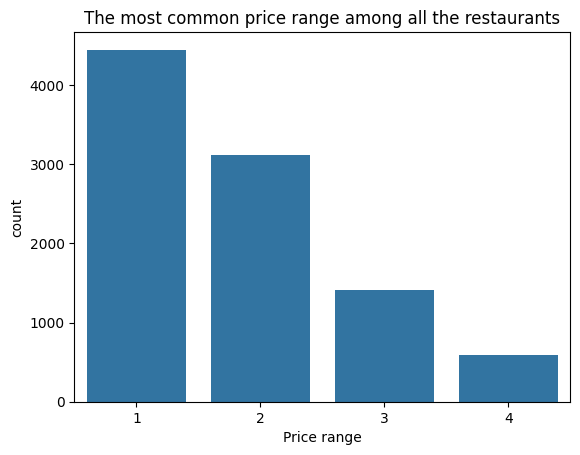

In [124]:
sns.countplot(x = data["Price range"], data= data, order= data["Price range"].value_counts().index)
plt.title("The most common price range among all the restaurants")
plt.show()

In [125]:
rating_average = data.groupby('Price range')["Aggregate rating"].mean()
rating_average

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

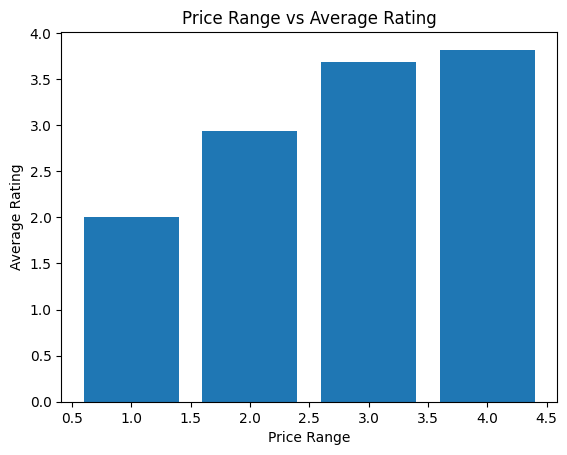

In [126]:
plt.bar(x = rating_average.index, height= rating_average, data=data)
plt.title("Price Range vs Average Rating")
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

In [127]:
price_range_1 = data[(data['Price range'] ==1 )]
price_range_1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
23,6601005,Caf�� Daniel Briand,30,Bras�_lia,"SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.882667,-15.777500,Cafe,...,Brazilian Real(R$),No,No,No,No,1,3.8,Yellow,Good,9
30,6600060,Sandubas Caf��,30,Bras�_lia,"Edif�_cio Jos�� Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Bras�_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
83,17284203,BJ's Country Buffet,216,Albany,"2401 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.207095,31.608743,"American, BBQ",...,Dollar($),No,No,No,No,1,3.3,Orange,Average,25
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219400,31.615800,Mexican,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,7101011,Ekim Burgers,148,Wellington City,"257 Cuba Street, Te Aro, Wellington City",Te Aro,"Te Aro, Wellington City",174.774151,-41.296107,Fast Food,...,NewZealand($),No,No,No,No,1,4.5,Dark Green,Excellent,195
9337,6900714,Pepe's Piri Piri,215,Birmingham,"254-256 Alum Rock Road, Alum Rock, Birmingham ...",Alum Rock,"Alum Rock, Birmingham",-1.846811,52.488557,Fast Food,...,Pounds(��),No,No,No,No,1,2.8,Orange,Average,26
9338,6900883,Ju Ju's Cafe,215,Birmingham,"1 Canal Square, Brindleyplace, Birmingham B16 8EH",Brindleyplace,"Brindleyplace, Birmingham",-1.918049,52.477569,"Cafe, British",...,Pounds(��),No,No,No,No,1,3.7,Yellow,Good,13
9353,6901394,Jamjar,215,Birmingham,"418 Coventry Road, Small Heath, Birmingham B10...",Small Heath,"Small Heath, Birmingham",-1.860593,52.470571,"Ice Cream, Desserts, Cafe",...,Pounds(��),No,No,No,No,1,3.1,Orange,Average,11


In [128]:
rating_color_1 = price_range_1['Rating color']
rating_color_1

23          Yellow
30           White
83          Orange
84          Orange
85          Orange
           ...    
9319    Dark Green
9337        Orange
9338        Yellow
9353        Orange
9408        Orange
Name: Rating color, Length: 4444, dtype: object

In [129]:
index = ["Orange","Yellow","Dark Green","White","Green","Red"]

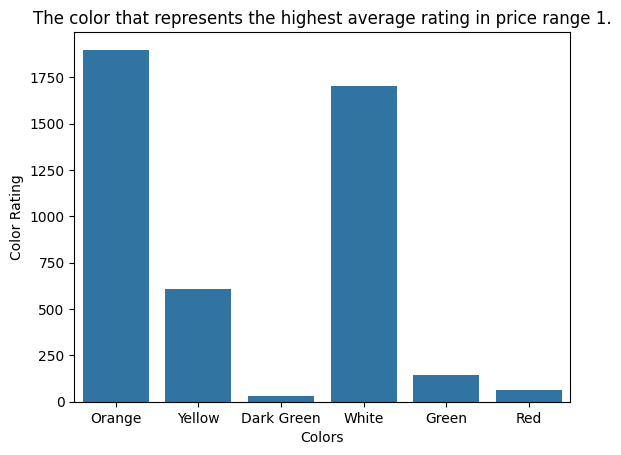

In [130]:
sns.countplot(x = rating_color_1 , order= index, data=data)
plt.title("The color that represents the highest average rating in price range 1.")
plt.xlabel('Colors')
plt.ylabel('Color Rating')
plt.show()

In [131]:
price_range_2 = data[(data['Price range'] ==2 )]
price_range_2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
18,18255654,Hobing Korean Dessert Cafe,162,Taguig City,"Third Floor, BGC Stopover Pavillion, Rizal Dri...","BGC Stopover Pavillion, Bonifacio Global City","BGC Stopover Pavillion, Bonifacio Global City,...",121.045878,14.554360,"Cafe, Korean, Desserts",...,Botswana Pula(P),No,No,No,No,2,4.5,Dark Green,Excellent,118
22,6600681,Chez Michou,30,Bras�_lia,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.881789,-15.764142,"Fast Food, French",...,Brazilian Real(R$),No,No,No,No,2,3.0,Orange,Average,6
24,6600292,Casa do Biscoito Mineiro,30,Bras�_lia,"SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...",Asa Norte,"Asa Norte, Bras�_lia",-47.882136,-15.757472,Bakery,...,Brazilian Real(R$),No,No,No,No,2,3.7,Yellow,Good,11
26,6600970,Pizza �� Bessa,30,Bras�_lia,"SCS 214, Bloco C, Loja 40, Asa Sul, Bras�_lia",Asa Sul,"Asa Sul, Bras�_lia",-47.915667,-15.831167,Pizza,...,Brazilian Real(R$),No,No,No,No,2,3.2,Orange,Average,11
41,6601457,Brazilian American Burgers,30,Bras�_lia,"CLSN 301, Bloco C, Loja 86, Sudoeste, Bras�_lia",Sudoeste,"Sudoeste, Bras�_lia",-47.921028,-15.797531,"American, Burger",...,Brazilian Real(R$),No,No,No,No,2,3.6,Yellow,Good,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,5904116,J'adore Chocolatier,208,��stanbul,"Asmal۱mescit Mahallesi, ��stiklal Caddesi, Emi...",Asmal۱mescit,"Asmal۱mescit, ��stanbul",28.976127,41.033002,Desserts,...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1311
9538,5901782,Starbucks,208,��stanbul,"Bebek Mahallesi, Cevdetpa��a Caddesi, No 30/A,...",Bebek,"Bebek, ��stanbul",29.043734,41.077696,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.9,Dark Green,Excellent,1042
9543,5916085,Dem Karak�_y,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, Hoca Ta...",Karak�_y,"Karak�_y, ��stanbul",28.978237,41.024633,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9544,5915547,Karak�_y G�_ll�_o��lu,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977636,41.022904,"Desserts, B�_rek",...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305


In [132]:
rating_color_2 = price_range_2['Rating color']
rating_color_2

18      Dark Green
22          Orange
24          Yellow
26          Orange
41          Yellow
           ...    
9537    Dark Green
9538    Dark Green
9543    Dark Green
9544    Dark Green
9550         Green
Name: Rating color, Length: 3113, dtype: object

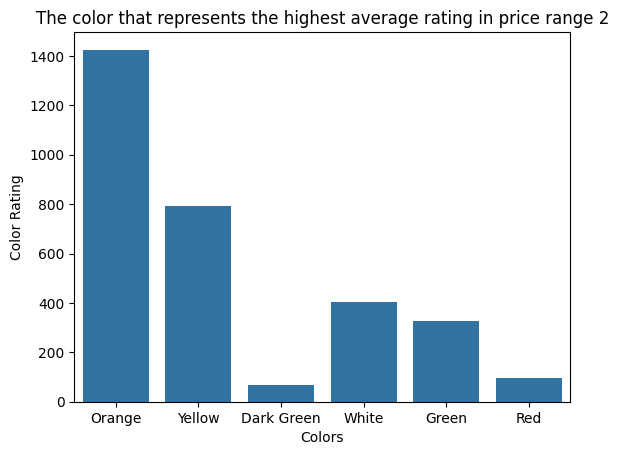

In [133]:
sns.countplot(x = rating_color_2 , order= index , data=data)
plt.title("The color that represents the highest average rating in price range 2")
plt.xlabel('Colors')
plt.ylabel('Color Rating')
plt.show()

In [134]:
price_range_3 = data[(data['Price range'] == 3 )]
price_range_3

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9541,5905215,Emirgan S�_ti��,208,��stanbul,"Emirgan Mahallesi, Sak۱p Sabanc۱ Caddesi, No 4...",Emirg��n,"Emirg��n, ��stanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877
9542,5926979,Leman K�_lt�_r,208,��stanbul,"Cafera��a Mahallesi, Ne��et �_mer Sokak, No 9/...",Kad۱k�_y Merkez,"Kad۱k�_y Merkez, ��stanbul",29.022805,40.989705,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506
9545,5915054,Baltazar,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, K۱l۱�_ ...",Karak�_y,"Karak�_y, ��stanbul",28.981103,41.025785,"Burger, Izgara",...,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788


In [135]:
rating_color_3 = price_range_3['Rating color']
rating_color_3

0       Dark Green
1       Dark Green
5            Green
9       Dark Green
10      Dark Green
           ...    
9541         Green
9542        Yellow
9545         Green
9546         Green
9547         Green
Name: Rating color, Length: 1408, dtype: object

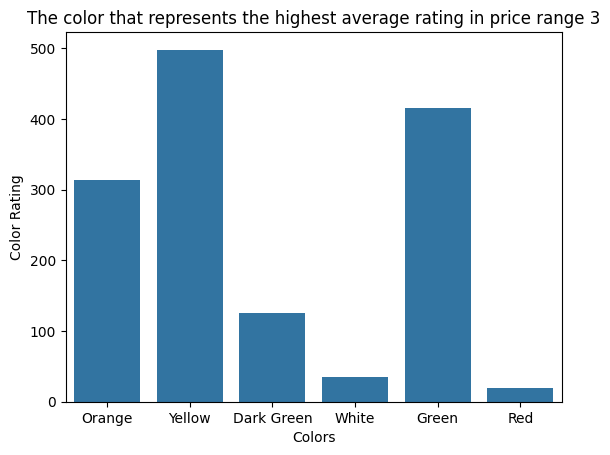

In [136]:
sns.countplot(x = rating_color_3 , order= index , data=data)
plt.title("The color that represents the highest average rating in price range 3")
plt.xlabel('Colors')
plt.ylabel('Color Rating')
plt.show()

In [137]:
price_range_4 = data[(data['Price range'] == 4 )]
price_range_4

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,6000409,Cafemiz,208,Ankara,"Gaziosmanpa��a Mahallesi, Arjantin Caddesi, No...",Gazi Osman Pa��a,"Gazi Osman Pa��a, Ankara",32.865683,39.897872,"World Cuisine, Mexican, Italian",...,Turkish Lira(TL),No,No,No,No,4,4.4,Green,Very Good,115
9526,6000019,Nusr-Et,208,Ankara,"Gaziosmanpa��a Mahallesi, �_ehit �_mer Haluk S...",Gazi Osman Pa��a,"Gazi Osman Pa��a, Ankara",32.864833,39.899667,Steak,...,Turkish Lira(TL),No,No,No,No,4,4.1,Green,Very Good,97
9540,5927248,Draft Gastro Pub,208,��stanbul,"Caddebostan Mahallesi, Ba��dat Caddesi, No 349...",Caddebostan,"Caddebostan, ��stanbul",29.074116,40.963935,Bar Food,...,Turkish Lira(TL),No,No,No,No,4,4.9,Dark Green,Excellent,522
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661


In [138]:
rating_color_4 = price_range_4['Rating color']
rating_color_4

2            Green
3       Dark Green
4       Dark Green
6            Green
7            Green
           ...    
9525         Green
9526         Green
9540    Dark Green
9548        Yellow
9549         Green
Name: Rating color, Length: 586, dtype: object

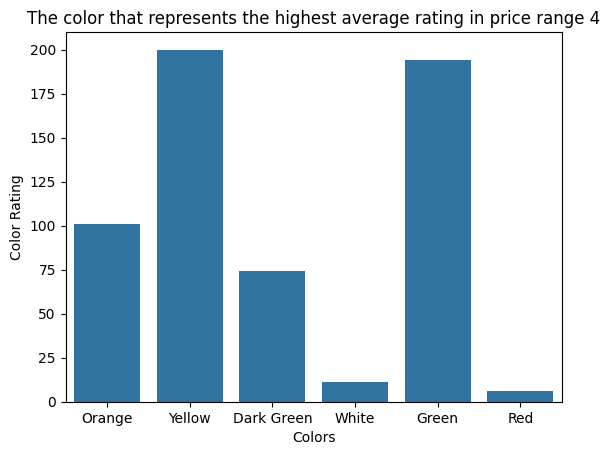

In [139]:
sns.countplot(x = rating_color_4 , order= index , data=data)
plt.title("The color that represents the highest average rating in price range 4")
plt.xlabel('Colors')
plt.ylabel('Color Rating')
plt.show()

# Task 3: Feature Engineering

In [141]:
data['length_of_resName'] = data['Restaurant Name'].apply(len)
data['length_of_resName']

0       16
1       16
2       22
3        4
4       11
        ..
9546    11
9547    12
9548     5
9549    11
9550    24
Name: length_of_resName, Length: 9551, dtype: int64

In [142]:
data['length_of_resAdd'] = data['Address'].apply(len)
data['length_of_resAdd']

0        71
1        67
2        56
3        70
4        64
       ... 
9546    103
9547     77
9548     73
9549     75
9550     65
Name: length_of_resAdd, Length: 9551, dtype: int64

In [149]:
data['Has Online delivery'] = np.where(data['Has Online delivery']=='Yes',1,0)
data['Has Table booking'] = np.where(data['Has Table booking']=='Yes',1,0)

In [147]:
data.loc[:, ["Restaurant Name","Has Online delivery","Has Table booking"]]

,Restaurant Name,Has Online delivery,Has Table booking
0,Le Petit Souffle,0,1
1,Izakaya Kikufuji,0,1
2,Heat - Edsa Shangri-La,0,1
3,Ooma,0,0
4,Sambo Kojin,0,1
...,...,...,...
9546,Naml۱ Gurme,0,0
9547,Ceviz A��ac۱,0,0
9548,Huqqa,0,0
9549,A���k Kahve,0,0


In [148]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'length_of_resName', 'length_of_resAdd'],
      dtype='object')